In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, mannwhitneyu
from tqdm.auto import tqdm

sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

# Задание 2 #

***Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений. Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной. При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667.***

***Какой набор предложений можно считать лучшим? Какие метрики стоит проанализировать для принятия правильного решения и как?.***

In [2]:
a_b_results = pd.read_csv('C:/Users/serge/Documents/IT/KarpovCourses/final_project/problem2.csv', sep=';')
a_b_results

user_id  revenue testgroup
0             1        0         b
1             2        0         a
2             3        0         a
3             4        0         b
4             5        0         b
...         ...      ...       ...
404765   404766        0         a
404766   404767        0         b
404767   404768      231         a
404768   404769        0         a
404769   404770        0         b

[404770 rows x 3 columns]

In [3]:
# Делаем проверку на пропуски в данных

a_b_results.isna().sum()

user_id      0
revenue      0
testgroup    0
dtype: int64

In [4]:
# Проверим число пользователей в тестовой и контрольной группах
users_control = a_b_results.groupby('testgroup', as_index=False) \
                           .agg({'user_id': 'count'}) \
                           .user_id[0]

users_test = a_b_results.groupby('testgroup', as_index=False) \
                        .agg({'user_id': 'count'}) \
                        .user_id[1]

users_dif = str(((users_test / users_control - 1) * 100).round(2)) + '%'

print('Число пользователей в контрольной группе: {}'.format(users_control))
print('Число пользователей в тестовой группе: {}'.format(users_test))
print('Разница: {}'.format(users_dif))

Число пользователей в контрольной группе: 202103
Число пользователей в тестовой группе: 202667
Разница: 0.28%


In [5]:
# Проверим число клиентов в тестовой и контрольной группах

clients_control = a_b_results.query('revenue != 0') \
                             .groupby('testgroup', as_index=False) \
                             .agg({'user_id': 'count'}) \
                             .user_id[0]

clients_test = a_b_results.query('revenue != 0') \
                          .groupby('testgroup', as_index=False) \
                          .agg({'user_id': 'count'}) \
                          .user_id[1]

clients_dif = str(((clients_test / clients_control - 1) * 100).round(2)) + '%'

print('Число клиентов (платящих пользователей) в контрольной группе: {}'.format(clients_control))
print('Число клиентов (платящих пользователей) в тестовой группе: {}'.format(clients_test))
print('Разница: {}'.format(clients_dif))

Число клиентов (платящих пользователей) в контрольной группе: 1928
Число клиентов (платящих пользователей) в тестовой группе: 1805
Разница: -6.38%


In [6]:
# Посчитаем доход для тестовой и контрольной групп

profit_control = a_b_results.groupby('testgroup', as_index=False) \
                            .agg({'revenue': 'sum'}) \
                            .revenue[0]

profit_test = a_b_results.groupby('testgroup', as_index=False) \
                            .agg({'revenue': 'sum'}) \
                            .revenue[1]

profit_dif = str(((profit_test / profit_control - 1) * 100).round(2)) + '%'

print('Доход от контрольной группы: {}'.format(profit_control))
print('Доход от тестовой группы: {}'.format(profit_test))
print('Разница: {}'.format(profit_dif))

Доход от контрольной группы: 5136189
Доход от тестовой группы: 5421603
Разница: 5.56%


In [7]:
# Посчитаем конверсию для тестовой и контрольной групп

conversion_control = clients_control / users_control
conversion_control_percent = str(((clients_control / users_control) * 100).round(2)) + '%'

conversion_test = clients_test / users_test
conversion_test_percent = str(((clients_test / users_test) * 100).round(2)) + '%'

conversion_dif = str(((conversion_test * 100 - conversion_control * 100) * 100).round(2)) + '%'

print('Конверсия контрольной группы: {:.2%}'.format(conversion_control.round(4)))
print('Конверсия тестовой группы: {:.2%}'.format(conversion_test.round(4)))
print('Разница: {}'.format(conversion_dif))

Конверсия контрольной группы: 0.95%
Конверсия тестовой группы: 0.89%
Разница: -6.33%


In [8]:
# Посчитаем ARPPU - средний доход с платящего пользователя (клиента) для тестовой и контрольной групп

arppu_control = profit_control / clients_control

arppu_test = profit_test / clients_test

arppu_dif = str(((arppu_test / arppu_control - 1) * 100).round(2)) + '%'

print('Cредний доход с клиента контрольной группы (ARPPU): {}'.format(arppu_control.round(2)))
print('Cредний доход с клиента тестовой группы (ARPPU): {}'.format(arppu_test.round(2)))
print('Разница: {}'.format(arppu_dif))

Cредний доход с клиента контрольной группы (ARPPU): 2664.0
Cредний доход с клиента тестовой группы (ARPPU): 3003.66
Разница: 12.75%


In [9]:
# Посчитаем ARPU - средний доход с пользователя для тестовой и контрольной групп

arpu_control = arppu_control * conversion_control

arpu_test = arppu_test * conversion_test

arpu_dif = str(((arpu_test / arpu_control - 1) * 100).round(2)) + '%'

print('Cредний доход с пользователя контрольной группы (ARPU) - {}'.format(arpu_control.round(2)))
print('Cредний доход с пользователя тестовой группы (ARPU) - {}'.format(arpu_test.round(2)))
print('Разница: {}'.format(arpu_dif))

Cредний доход с пользователя контрольной группы (ARPU) - 25.41
Cредний доход с пользователя тестовой группы (ARPU) - 26.75
Разница: 5.26%


In [10]:
# Для наглядности сформируем таблицу метрик

metrics = pd.DataFrame({'group': ['control', 
                                  'test', 
                                  'difference'], 
                        'useres': [users_control, 
                                   users_test, 
                                   users_dif],
                        'clients': [clients_control, 
                                    clients_test, 
                                    clients_dif],
                        'profit': [profit_control, 
                                   profit_test, 
                                   profit_dif],
                        'conversion': [conversion_control_percent, 
                                       conversion_test_percent, 
                                       conversion_dif],
                        'arppu': [arppu_control.round(2), 
                                  arppu_test.round(2), 
                                  arppu_dif],
                        'arpu': [arpu_control.round(2), 
                                 arpu_test.round(2), 
                                 arpu_dif]})

In [11]:
metrics

group  useres clients   profit conversion    arppu   arpu
0     control  202103    1928  5136189      0.95%   2664.0  25.41
1        test  202667    1805  5421603      0.89%  3003.66  26.75
2  difference   0.28%  -6.38%    5.56%     -6.33%   12.75%  5.26%

***Замечание 1:***
   
   Глядя на метрики, можно сказать, что набор акционных предложений для тестовой группы приносит больше прибыли.
   
   Несмотря на то, что число платящих пользователей снизилось, показатели ARPU и ARPPU выросли. Но: бизнесу захочется понять, чем объясняется эта изменчивость (разница, которую мы наблюдаем), за счет какой аудитории достигли эффекта?

In [12]:
# Посмотрим на покупки пользователей. 
# Оставляем клиентов в каждой из групп и сортируем группы по убыванию дохода с клиента

paying_users_control = a_b_results.query('revenue != 0 & testgroup == "a"') \
                                  .sort_values('revenue', ascending=False) \
                                  .reset_index(drop=True) 
paying_users_test = a_b_results.query('revenue != 0 & testgroup == "b"') \
                               .sort_values('revenue', ascending=False) \
                               .reset_index(drop=True)

In [13]:
paying_users_control

user_id  revenue testgroup
0      101862    37433         a
1      196602    37407         a
2       65078    37394         a
3       21586    37385         a
4      142805    37379         a
...       ...      ...       ...
1923   119129      200         a
1924   246510      200         a
1925   230063      200         a
1926   340913      200         a
1927   104976      200         a

[1928 rows x 3 columns]

In [14]:
paying_users_control.revenue.describe()

count     1928.000000
mean      2663.998444
std       9049.039763
min        200.000000
25%        257.000000
50%        311.000000
75%        361.000000
max      37433.000000
Name: revenue, dtype: float64

In [15]:
paying_users_test

user_id  revenue testgroup
0      149619     4000         b
1       34358     4000         b
2       36473     3999         b
3      185455     3999         b
4       85615     3995         b
...       ...      ...       ...
1800   159970     2003         b
1801   378688     2003         b
1802   251211     2002         b
1803   397184     2001         b
1804   301171     2000         b

[1805 rows x 3 columns]

In [16]:
paying_users_test.revenue.describe()

count    1805.000000
mean     3003.658172
std       572.619709
min      2000.000000
25%      2513.000000
50%      3022.000000
75%      3478.000000
max      4000.000000
Name: revenue, dtype: float64

In [17]:
# Посмотрим число аномально дорогих покупок и их сумму

anomal_pecent = (paying_users_control.query('revenue > 37000').revenue.sum() / profit_control * 100).round(2)

print('Число аномально дорогих покупок:', paying_users_control.query('revenue > 37000').shape[0])
print('Сумма этих покупок:', paying_users_control.query('revenue > 37000').revenue.sum())     
print('Общая прибыль в контрольной группе:', paying_users_control.revenue.sum())
print('Доля дохода с этих покупок:', anomal_pecent, '%')

Число аномально дорогих покупок: 123
Сумма этих покупок: 4590252
Общая прибыль в контрольной группе: 5136189
Доля дохода с этих покупок: 89.37 %


***Замечание 2:***
   
   По таблицам видно различие медианных значений покупок в контрольной и тестовой группах. 
   В контрольной группе 123 покупки из 1928 отвечают за 89% прибыли, тем самым сильно смещают показатель среднего.

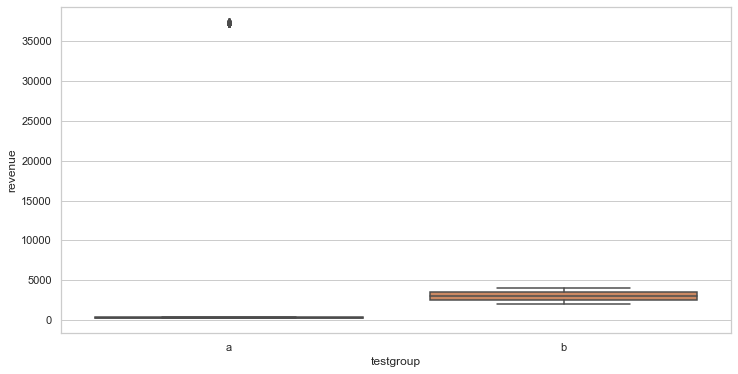

In [18]:
# Построим боксплот по покупкам пользователей (a - контрольная группа, b - тестовая группа)

a_b_results_payed = a_b_results.query('revenue != 0')
sns.boxplot(data=a_b_results_payed, x="testgroup", y="revenue")
sns.set()

***Замечание 3:***
   
   На графике видны выбросы в контрольной выборке пользователей. Они и утягивают средние значения. По графику также видно увеличение дохода в тестовой группе.
   
   Но делать вывод только по графику – не очень хорошо, поэтому проверим наши гипотезы (об отличиях средних значений выборок) с помощью статистических тестов.

## Предложения: ##


***1. Предположим, что аномальные значения (выбросы в контрольной группе) - это нормально. Проверим гипотезу о статистически значимом повышении среднего уровня дохода.***

***2. Предположим, что аномальные значения - это ошибка. Проведем A-A тест и проверим работу сплитовщика. Исключим аномальные значения из выборки и проверим гипотезу о статистически значимом повышении среднего уровня дохода.***
        
        Стоит отметить, что обе идеи имеют право на существование. Сначала кажется, что аномальные значения просто 
        неправильно посчитаны для этих 123 пользователей. 
        Но с другой стороны, можем представить, что приложение имеет подписочную систему и для тестовой группы убрали
        возможность оформить годовую подписку (в контрольной группе выбросами считаем клиентов, оформивших годовую 
        подписку). 

### Предположение 1 ###
***Предположим, что аномальные значения - это не ошибка.***


Проверяем на нормальность контрольные и тестовые группы.

H0: распределение значений нормальное.
H1: распределение значений отличается от нормального.

In [19]:
control_revenue = a_b_results[a_b_results.testgroup == 'a'].revenue

stats.shapiro(control_revenue)

ShapiroResult(statistic=0.008876502513885498, pvalue=0.0)

In [20]:
test_revenue = a_b_results[a_b_results.testgroup == 'b'].revenue

stats.shapiro(test_revenue)

ShapiroResult(statistic=0.06588172912597656, pvalue=0.0)

Значение p-value < 0.05 в обоих группах, следовательно отклоняем нулевую гипотезу. Распределение значений отличается от нормального. 

Для сравнения выручки (ARPU) в контрольной и тестовой группах используем непараметрический критерий Манна-Уитни.

In [68]:
mannwhitneyu(control_revenue, test_revenue)

MannwhitneyuResult(statistic=20468349325.0, pvalue=0.03134850658037196)

Значение P-value < 0.05, следовательно *(в случае если в нашей компании принято считать пороговым значением уровень p-value = 0.05)* распределения значений выручки в контрольной и тестовой группах значимо различаются.

    Но есть несколько замечаний:
        1. существует проблема интерпритации теста Манна-Уитни. Он проверяет статзначимость различий средних значений рангов
        между группами;
        2. уровень p-value = 0,03 показывает не сильную статистическую значимость. Нужно быть уверенным в весомости
        изменений, чтобы раскатить обновление в продакшн. 




Проверим гипотезу о статистически значимом повышении среднего уровня дохода с помощью Bootstrap.

In [64]:
# Объявим функцию, которая позволит нам проверить гипотезу с помощью бутстрапа (с np.mean)

def get_bootstrap_mean(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

### Гипотезы: ###

*H0 - ARPU тестовой и контрольной группы статистически не отличается.*

*H1 - ARPU тестовой и контрольной группы статистически отличается.*

Запускаем бутстрап по средним значениям

  0%|          | 0/1000 [00:00<?, ?it/s]

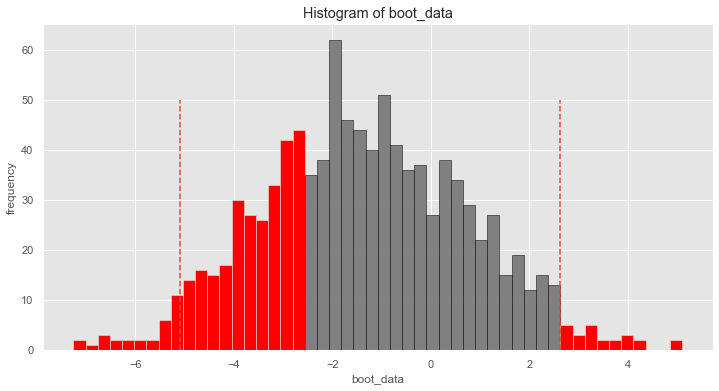

In [65]:
booted_data_mean = get_bootstrap_mean(control_revenue, test_revenue) 
# в результате хранится разница двух распределений, ДИ и pvalue

In [66]:
print('P-value =', booted_data_mean["p_value"].round(4))

P-value = 0.5142


In [67]:
booted_data_mean["quants"] # Доверительный интервал

0
0.025 -5.095302
0.975  2.611869

### Итог 1 ###

*P-value > 0,05, следовательно мы не можем отклонить нулевую гипотезу. Бутстрап по средним показывает, что ARPU значимо не различаются.*

**Если** выяснится, что **данные собраны корректно**, и что аномальные значения - это нормально, **то** можем сказать, что **выкатывать обновление с новым набором предложений нет смысла, т.к. показатели дохода значимо не различаются.**


### Предложение 2 ###

Предположим, что аномальные значения - это ошибка.

Проведем A-A тест и проверим работу сплитовщика. Исключим аномальные значения из выборки и проверим гипотезу о статистически значимом повышении среднего уровня дохода с помощью Bootstrap.

*Запускаем A-A тест по нашим данным*

  0%|          | 0/1000 [00:00<?, ?it/s]

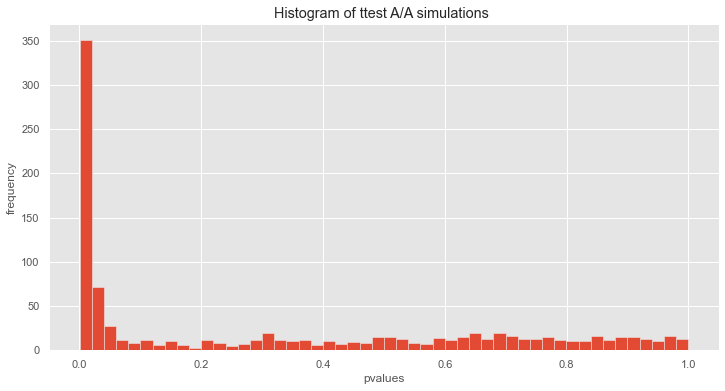

Уровень альфа = 0.437


In [70]:
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = a_b_results.query('testgroup == "a"').revenue.sample(n_s, replace = False).values
    s2 = a_b_results.query('testgroup == "b"').revenue.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа (0.05)
print('Уровень альфа =', (sum(np.array(res) < 0.05) / simulations))

*Количество ложноположительных случаев сильно превышает значение альфа!* ***Система сплитования сломана.***

*Необходим подтянуть дополнительную информацию о пользователях и проверить разницу в различных группах (аномальное различие фактов покупок в различных группах).*

До тех пор, исключим аномальные значения из выборки и проверим гипотезу о статистически значимом повышении среднего уровня дохода с помощью Bootstrap.

In [75]:
paying_users_control

user_id  revenue testgroup
0      101862    37433         a
1      196602    37407         a
2       65078    37394         a
3       21586    37385         a
4      142805    37379         a
...       ...      ...       ...
1923   119129      200         a
1924   246510      200         a
1925   230063      200         a
1926   340913      200         a
1927   104976      200         a

[1928 rows x 3 columns]

In [76]:
# Оставим клиентов без аномально высоких доходов

normal_paying_users_control = paying_users_control.query('revenue < 37000')
normal_paying_users_test = paying_users_test.query('revenue < 37000')

<AxesSubplot:xlabel='testgroup', ylabel='revenue'>

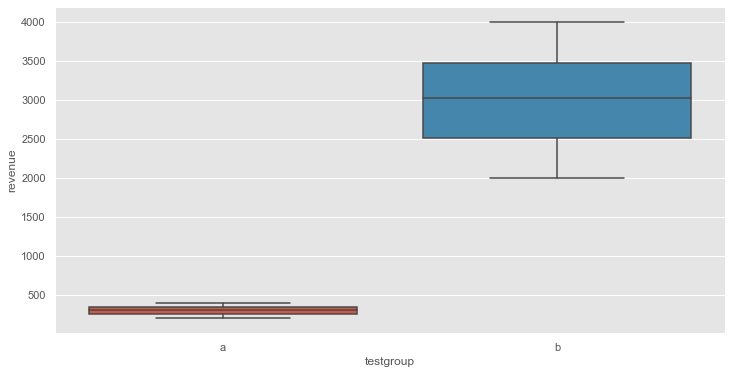

In [80]:
# Построим боксплот по покупкам пользователей (a - контрольная группа без аномалий, b - тестовая группа)

normal_a_b_results_payed = a_b_results.query('0 < revenue < 37000')
sns.boxplot(data=normal_a_b_results_payed, x="testgroup", y="revenue")

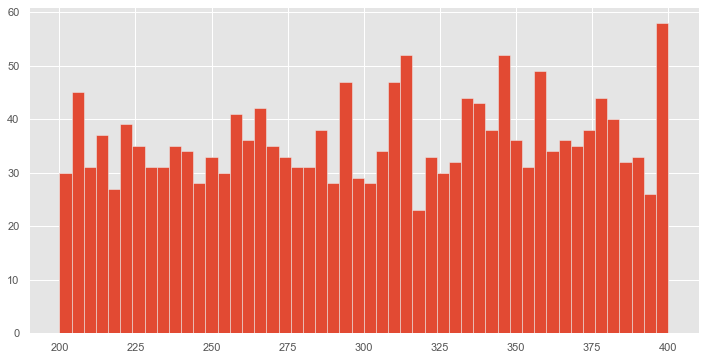

In [81]:
# Построим график значений контрольной группы (клиенты, кроме аномалий)

plt.hist(normal_paying_users_control.revenue, bins = 50)
plt.show()

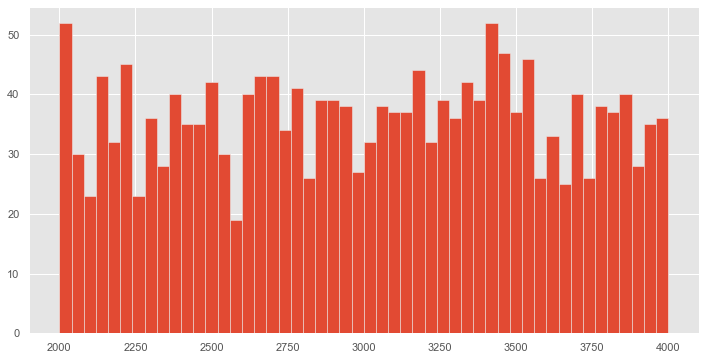

In [82]:
# Построим график значений тестовой группы (клиенты, кроме аномалий)

plt.hist(normal_paying_users_test.revenue, bins = 50)
plt.show()

### Гипотезы: ###

*H0 - ARPU тестовой и контрольной группы статистически не отличается.*

*H1 - ARPU тестовой и контрольной группы статистически отличается.*

In [ ]:
# Запускаем бутстрап по средним значениям

  0%|          | 0/1000 [00:00<?, ?it/s]

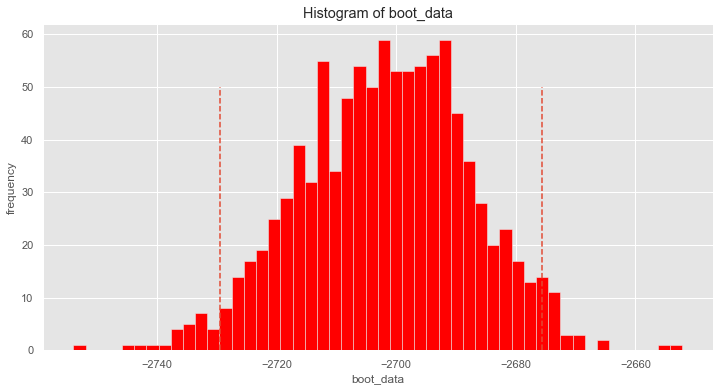

In [89]:
booted_data_mean = get_bootstrap_mean(normal_paying_users_control.revenue, normal_paying_users_test.revenue) 
# в результате хранится разница двух распределений, ДИ и pvalue

In [90]:
print('P-value =', booted_data_mean["p_value"].round(4))

P-value = 0.0


In [91]:
booted_data_mean["quants"] # Доверительный интервал

0
0.025 -2729.541911
0.975 -2675.666357

### Итог 2 ###

*В случае если исключить аномально высокие значения, P-value < 0,05 - следовательно мы сможем отклонить нулевую гипотезу. Бутстрап по средним показывает, что ARPU существенно увеличился. Ho есть большое но:*

**Если** выяснится, что **данные собраны некорректно**, и что аномальные значения - нужно исключить, **то мы** всё равно **не можем** сказать **выкатывать обновление с новым набором предложений, т.к. необходимо будет провести новый A-B тест.**

# Вывод #

#### Как бы то ни было, A-B тест проведен неудачно. ####

    1. Если сплитовщик сработал корректно, и пользователи разбились корректно, то по критерию Манна-Уитни видно
    статистически значимое различие выборок. Но бутстрап показал, что разница по средним значениям не является
    статистически значимой. 
    По одному лишь результату критерия Манна-Уитни, я бы не рекомендовал выкатывать обновление.
    
    2. Если сплитовщик сломан, то его необходимо исправить и заново провести A-B тест. 
       
     
    Комментарии:
        Можно подтянуть в текущую таблицу дополнительные данные о пользователях (например: платформа, геолокацию, возраст),
    и проанализировать группы пользователей. Возможно найдется группа, которая ломает данные. В таком случае стоит учесть
    это при новом сплитовании пользователей для нового A/B эксперимента.   
    
        Также можно попробовать удалить топ пользователей (по выручке), но на предэкспериментальном периоде. При этом надо
    помнить, что в таком случае топ пользователей может ввести себя не так, как остальные, и из-за этого мы можем принять 
    неверное решение. Поэтому стоит дополнительно валидировать это предположение на старых A/B-тестах.